In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
import os
os.getcwd()


'C:\\Users\\mohan-prakashj'

In [3]:
os.chdir('P:\SAMPLE DATA')

In [4]:
df=pd.read_csv('Output.csv')

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,AFACostUnitPrice,AFAGroup,AFAInvNetTotal,AFAInvNo,AFASellUnitPrice,AFASupplier,AFUnitPrice,AfReference,AgchemForecast,AgchemPackConversion,...,ProdCode (Custom SQL Query1),ProdCode,ProdCostCentre,ProdManufacturer,ProdName,ProdPack,ProdStatus,ProductAreaName,SubProdCategoryID,SubProdCategory
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NUmebr of Rows and columns before removing negativevalues (365536, 41) and number of rows and columns after removing negative values in the table (189932, 52)

In [6]:
df.shape

(189932, 52)

In [7]:
df.describe()

,AFACostUnitPrice,AFAInvNetTotal,AFAInvNo,AFASellUnitPrice,AFUnitPrice,AfReference,AgchemForecast,AgchemPackConversion,CHECKAfiAffinityLevy,CHECKOrderId,...,Total Uplift,Total Uplift %,FinPd,FinYearInv,InvQty,InvoiceRegisterEntryId,MemberNumber,OrdNo,ProdCategoryID,SubProdCategoryID
count,171551.000000,180034.000000,151550.000000,179990.000000,171551.000000,1.502460e+05,0.0,587.000000,180034.000000,1.0,...,171520.000000,115217.000000,180034.000000,180034.000000,180034.000000,1.800340e+05,189858.000000,1.800340e+05,180034.000000,9727.000000
mean,29.451748,197.945315,219420.854464,33.988265,29.250769,7.945450e+06,NaN,21.296593,1.075558,5715997.0,...,20.105926,0.075997,6.266122,14.392715,288.736389,4.224946e+06,641760.642749,5.535362e+06,140.307897,442.212296
std,284.219955,827.767059,39690.440965,282.606107,283.581498,5.873310e+05,NaN,90.099642,0.846405,NaN,...,486.430414,0.971381,3.625664,1.153190,740.703657,1.856807e+06,27472.794620,8.732596e+05,105.559885,115.568819
min,0.000000,0.000000,150516.000000,0.000000,0.000000,2.724154e+06,NaN,1.000000,0.000000,5715997.0,...,0.000000,0.000000,1.000000,13.000000,0.010000,1.310530e+05,611023.000000,2.991576e+06,2.000000,8.000000
25%,0.000000,4.710000,185024.250000,0.487900,0.000000,7.460497e+06,NaN,1.500000,0.400000,5715997.0,...,0.642300,0.024104,3.000000,13.000000,1.000000,4.161700e+06,621029.000000,5.174590e+06,7.000000,425.000000
50%,0.449190,35.020000,220273.000000,1.965000,0.446800,7.931625e+06,NaN,5.000000,0.700000,5715997.0,...,5.137500,0.054545,6.000000,14.000000,1.000000,4.803094e+06,627806.000000,5.681624e+06,196.000000,497.000000
75%,4.804757,252.772500,253293.750000,13.480000,4.761900,8.406104e+06,NaN,15.000000,2.000000,5715997.0,...,18.700000,0.074996,10.000000,15.000000,500.000000,5.409146e+06,665820.000000,6.205276e+06,202.000000,504.000000
max,63986.820000,171716.160000,288437.000000,63986.820000,63986.820000,8.945516e+06,NaN,1000.000000,3.000000,5715997.0,...,170016.000000,128.319955,12.000000,17.000000,30996.000000,6.077689e+06,699995.000000,6.810082e+06,507.000000,504.000000


In [8]:
df.columns

Index(['AFACostUnitPrice', 'AFAGroup', 'AFAInvNetTotal', 'AFAInvNo',
       'AFASellUnitPrice', 'AFASupplier', 'AFUnitPrice', 'AfReference',
       'AgchemForecast', 'AgchemPackConversion', 'AgchemProdPack',
       'CHECKAfiAffinityLevy', 'CHECKOrderId', 'CHECKUpliftedCostPrice',
       'CMemNo2', 'CMemNo', 'CMemTradName', 'CMemType', 'AF Total',
       'AFA Cost Total', 'AFA Sell Total', 'Gross Margin', 'Gross Margin %',
       'Total Uplift', 'Total Uplift %', 'Statement Date', 'CostCentre',
       'FinPd', 'FinYearInv', 'FinYear', 'InvDate', 'InvQty', 'InvType',
       'InvoiceRegisterEntryId', 'InvoiceStateName', 'MemAlpha', 'MemStatus',
       'MemberNumber', 'OrdNo', 'PaymentTypeName', 'ProdCategoryID',
       'ProdCategory', 'ProdCode (Custom SQL Query1)', 'ProdCode',
       'ProdCostCentre', 'ProdManufacturer', 'ProdName', 'ProdPack',
       'ProdStatus', 'ProductAreaName', 'SubProdCategoryID',
       'SubProdCategory'],
      dtype='object')

<AxesSubplot:title={'center':'AFACostUnitPrice'}, xlabel='MemStatus'>

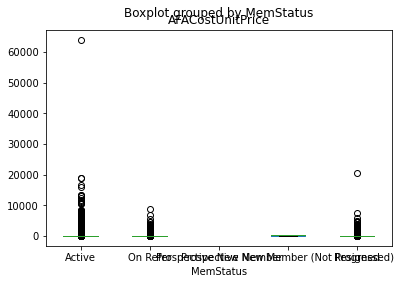

In [9]:
df.boxplot(by='MemStatus', column=['AFACostUnitPrice'],grid=False)

<AxesSubplot:>

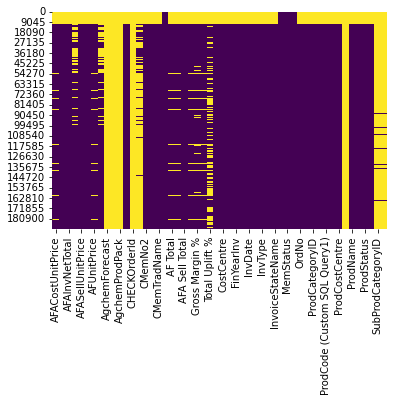

In [20]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [146]:
def negativevalue(data):
    remove=[]
    for i in data:
        if data==0:
            remove=data.drop()
        elif data=='str':
            print(data)
        else:
            print('Data has no null values')
    return 
        

In [147]:
negativevalue(df)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [10]:
df22=df.drop(['AgchemForecast', 'AgchemPackConversion', 'AgchemProdPack','SubProdCategoryID','SubProdCategory','ProdManufacturer','CHECKOrderId', 'CHECKUpliftedCostPrice','AFAGroup','AFASupplier','CMemNo2','CMemNo', 'CMemTradName'],axis=1)

<AxesSubplot:>

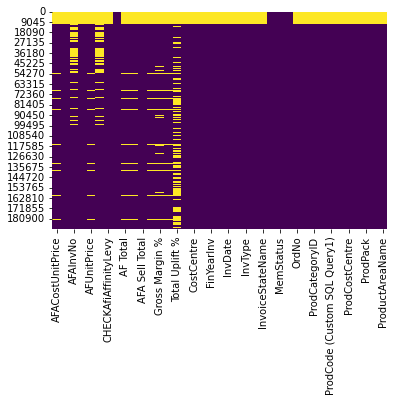

In [31]:
sns.heatmap(df22.isnull(),cbar=False,cmap='viridis')

In [16]:
df1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: AFACostUnitPrice, dtype: float64

In [11]:
print(df22['MemStatus'])

0         Resigned
1         Resigned
2         Resigned
3         Resigned
4         Resigned
            ...   
189927      Active
189928      Active
189929      Active
189930      Active
189931      Active
Name: MemStatus, Length: 189932, dtype: object


In [13]:
df1=df.iloc[:,0]

In [14]:
df1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: AFACostUnitPrice, dtype: float64

In [11]:
##Handling missing values 
df22['Total Uplift'].fillna((df22['Total Uplift'].mean()), inplace=True)
df22['Total Uplift %'].fillna((df22['Total Uplift %'].mean()), inplace=True)
df22['Gross Margin'].fillna((df22['Gross Margin'].mean()), inplace=True)
df22['Gross Margin %'].fillna((df22['Gross Margin %'].mean()), inplace=True)
df22['CMemType'].fillna((df22['CMemType'].value_counts().index[0]), inplace=True)
df22[['PaymentTypeName']]=df22[['PaymentTypeName']].fillna(value='Bank transfer or unknown')
df22=df22.drop(['AFAInvNo','AfReference','OrdNo'],axis=1)

In [12]:
df22.isnull().sum()

AFACostUnitPrice                18381
AFAInvNetTotal                   9898
AFASellUnitPrice                 9942
AFUnitPrice                     18381
CHECKAfiAffinityLevy             9898
CMemType                            0
AF Total                        18381
AFA Cost Total                  18381
AFA Sell Total                   9942
Gross Margin                        0
Gross Margin %                      0
Total Uplift                        0
Total Uplift %                      0
Statement Date                   9898
CostCentre                       9898
FinPd                            9898
FinYearInv                       9898
FinYear                          9898
InvDate                          9898
InvQty                           9898
InvType                          9898
InvoiceRegisterEntryId           9898
InvoiceStateName                 9898
MemAlpha                           74
MemStatus                          74
MemberNumber                       74
PaymentTypeN

In [13]:
df22['AFACostUnitPrice'].fillna((df22['AFACostUnitPrice'].mean()), inplace=True)
df22['AFAInvNetTotal'].fillna((df22['AFAInvNetTotal'].mean()), inplace=True)
df22['AFASellUnitPrice'].fillna((df22['AFASellUnitPrice'].mean()), inplace=True)
df22['AFUnitPrice'].fillna((df22['AFUnitPrice'].mean()), inplace=True)
df22['CHECKAfiAffinityLevy'].fillna((df22['CHECKAfiAffinityLevy'].mean()), inplace=True)
df22['AF Total'].fillna((df22['AF Total'].mean()), inplace=True)
df22['AFA Cost Total'].fillna((df22['AFA Cost Total'].mean()), inplace=True)
df22['AFA Sell Total'].fillna((df22['AFA Sell Total'].mean()), inplace=True)


<AxesSubplot:>

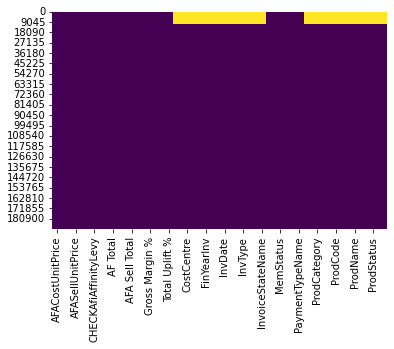

In [45]:
sns.heatmap(df22.isnull(),cbar=False,cmap='viridis')

In [14]:
df4=df22.dropna(axis=0)

In [15]:
df4.isnull().sum()

AFACostUnitPrice                0
AFAInvNetTotal                  0
AFASellUnitPrice                0
AFUnitPrice                     0
CHECKAfiAffinityLevy            0
CMemType                        0
AF Total                        0
AFA Cost Total                  0
AFA Sell Total                  0
Gross Margin                    0
Gross Margin %                  0
Total Uplift                    0
Total Uplift %                  0
Statement Date                  0
CostCentre                      0
FinPd                           0
FinYearInv                      0
FinYear                         0
InvDate                         0
InvQty                          0
InvType                         0
InvoiceRegisterEntryId          0
InvoiceStateName                0
MemAlpha                        0
MemStatus                       0
MemberNumber                    0
PaymentTypeName                 0
ProdCategoryID                  0
ProdCategory                    0
ProdCode (Cust

In [16]:
df4.sample(20)

,AFACostUnitPrice,AFAInvNetTotal,AFASellUnitPrice,AFUnitPrice,CHECKAfiAffinityLevy,CMemType,AF Total,AFA Cost Total,AFA Sell Total,Gross Margin,...,PaymentTypeName,ProdCategoryID,ProdCategory,ProdCode (Custom SQL Query1),ProdCode,ProdCostCentre,ProdName,ProdPack,ProdStatus,ProductAreaName
107670,0.000000,27.04,27.0485,0.000000,1.0,Affinity,0.000000,0.00000,27.0485,27.048500,...,Direct Debit,202.0,"Non HH, mains gas, MOP",MS-ELECTRIC,MS-ELECTRIC,10 UTILNH,Service Charge @ 5.25%,unit,Active,Non HH Electricity & Mains Gas
52736,0.420000,0.42,0.4200,0.420000,2.5,FarmBuyer,0.420000,0.42000,0.4200,0.000000,...,None,201.0,Mobile,MS-MOB,MS-MOB,8 UTILCOM,Monthly Mobile Contract,each,Active,Telecoms
52238,3.890000,3.89,3.8900,3.890000,2.5,FarmBuyer,3.890000,3.89000,3.8900,0.000000,...,None,201.0,Mobile,MS-MOB,MS-MOB,8 UTILCOM,Monthly Mobile Contract,each,Active,Telecoms
95584,0.000000,3.66,3.6645,0.000000,1.0,Affinity,0.000000,0.00000,3.6645,3.664500,...,Direct Debit,202.0,"Non HH, mains gas, MOP",MS-MGAS,MS-MGAS,10 UTILNH,Service Charge @ 5.25%,unit,Active,Non HH Electricity & Mains Gas
173121,0.000000,1.83,1.8332,0.000000,0.5,FarmBuyer,0.000000,0.00000,1.8332,1.833200,...,Direct Debit,196.0,Fuel Cards,FL-CARD,FL-CARD,5 FUELCAR,Service Charge @ 1.30%,each,Active,Fuel Cards
141370,0.000000,2.41,2.4116,0.000000,0.5,Affinity,0.000000,0.00000,2.4116,2.411600,...,Direct Debit,196.0,Fuel Cards,FL-CARD,FL-CARD,5 FUELCAR,Service Charge @ 1.30%,each,Active,Fuel Cards
156561,14.667600,15.24,15.2428,14.380000,2.0,Affinity,14.380000,14.66760,15.2428,0.575200,...,Direct Debit,213.0,Building Materials,BU-GEN,BU-GEN,13 GENBUI,2.5LT DULUX TRADE U/COAT WHITE,each,Active,Building Materials
150058,2.641800,5.43,2.7195,2.590000,2.0,Affinity,5.180000,5.28360,5.4390,0.155400,...,Direct Debit,211.0,General - Machinery,MC-MS,MC-MS,16 MACHIN,FLANGE SETSCREW M10X75,each,Active,Machinery
63309,6.324000,6.57,6.5720,6.200000,2.0,Affinity,6.200000,6.32400,6.5720,0.248000,...,Direct Debit,216.0,General - Supplies,MS-MISC,MS-MISC,14 GENSUP,Miscellaneous Items,each,Withdrawn,General Supplies
138200,10.010000,10.01,10.0100,10.010000,0.0,Affinity,10.010000,10.01000,10.0100,0.000000,...,Direct Debit,385.0,Charge card,MS-BARCLAYCARD,MS-BARCLAYCARD,19 NONLEV,Sainsburys Pfs1023 -,each,Active,Non Service Charge


<AxesSubplot:xlabel='MemStatus', ylabel='AFACostUnitPrice'>

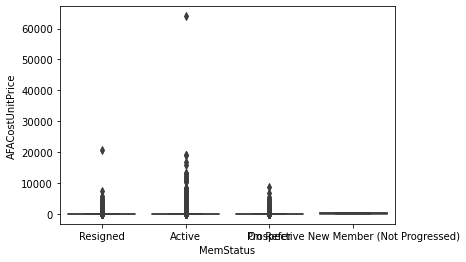

In [17]:
sns.boxplot(x='MemStatus',y='AFACostUnitPrice', data = df4)

In [18]:
df4.describe()

,AFACostUnitPrice,AFAInvNetTotal,AFASellUnitPrice,AFUnitPrice,CHECKAfiAffinityLevy,AF Total,AFA Cost Total,AFA Sell Total,Gross Margin,Gross Margin %,Total Uplift,Total Uplift %,FinPd,FinYearInv,InvQty,InvoiceRegisterEntryId,MemberNumber,ProdCategoryID
count,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.000000,179959.00000,1.799590e+05,179959.000000,179959.000000
mean,29.360783,197.324430,33.898381,29.160029,1.075645,186.755219,187.905049,197.323366,18.947727,0.340381,20.097766,0.076020,6.267272,14.393295,288.84779,4.226626e+06,641627.041393,140.342834
std,277.314659,826.056984,282.448310,276.691098,0.846510,659.744939,663.289757,825.987189,474.761264,0.422334,474.886326,0.777248,3.625812,1.153079,740.83693,1.855347e+06,27472.689714,105.552972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.01000,1.310530e+05,611404.000000,2.000000
25%,0.000000,4.700000,0.487900,0.000000,0.400000,0.000000,0.000000,4.711250,0.600500,0.029856,0.738100,0.042500,3.000000,13.000000,1.00000,4.161764e+06,620960.000000,7.000000
50%,0.455254,35.000000,1.963500,0.453000,0.700000,40.000000,40.218500,35.020000,5.201500,0.067582,6.024700,0.075997,6.000000,14.000000,1.00000,4.803134e+06,627814.000000,196.000000
75%,9.200400,252.600000,13.460050,9.085000,2.000000,233.350000,234.700000,252.550000,18.951682,1.000000,20.105926,0.075997,10.000000,15.000000,500.00000,5.409158e+06,665771.000000,202.000000
max,63986.820000,171716.160000,63986.820000,63986.820000,3.000000,63986.820000,63986.820000,171716.160000,170005.760000,1.000000,170016.000000,128.319955,12.000000,17.000000,30996.00000,6.077689e+06,696991.000000,507.000000


In [19]:
df5=df4.loc[(df4['MemStatus'] != 'Resigned') & (df4['MemStatus'] != 'Active')]

In [20]:
print(df5['MemStatus'])

4568      On Refer
4569      On Refer
22973     On Refer
22974     On Refer
22975     On Refer
            ...   
185402    On Refer
185403    On Refer
185404    On Refer
185405    On Refer
185406    On Refer
Name: MemStatus, Length: 8506, dtype: object


we thought in mem status ther will be only 2 categorical value but its turned out to be 3 , thats why cross validating data in every aspect step is important

In [21]:
df6=df4.loc[(df4['CMemType'] != 'Affinity') & (df4['CMemType'] != 'FarmBuyer')]

In [22]:
print(df6['CMemType'])

Series([], Name: CMemType, dtype: object)


In [23]:
df4.shape

(179959, 36)

In [24]:
df4.columns

Index(['AFACostUnitPrice', 'AFAInvNetTotal', 'AFASellUnitPrice', 'AFUnitPrice',
       'CHECKAfiAffinityLevy', 'CMemType', 'AF Total', 'AFA Cost Total',
       'AFA Sell Total', 'Gross Margin', 'Gross Margin %', 'Total Uplift',
       'Total Uplift %', 'Statement Date', 'CostCentre', 'FinPd', 'FinYearInv',
       'FinYear', 'InvDate', 'InvQty', 'InvType', 'InvoiceRegisterEntryId',
       'InvoiceStateName', 'MemAlpha', 'MemStatus', 'MemberNumber',
       'PaymentTypeName', 'ProdCategoryID', 'ProdCategory',
       'ProdCode (Custom SQL Query1)', 'ProdCode', 'ProdCostCentre',
       'ProdName', 'ProdPack', 'ProdStatus', 'ProductAreaName'],
      dtype='object')

**calculation outliers using Interquantile range**

In [25]:
def outliers(df, ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    iqr=q3-q1
    
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    
    ls=df.index[(df[ft]<lower_bound)| (df[ft]>upper_bound)]
    
    return ls
    

In [26]:
index_list=[]
for feature in ['Total Uplift','AFASellUnitPrice','AFUnitPrice','AFAInvNetTotal','CHECKAfiAffinityLevy','AF Total','AFA Cost Total','AFA Sell Total', 'Gross Margin', 'Gross Margin %', 'Total Uplift','Total Uplift %']:
    index_list.extend(outliers(df4,feature))

In [27]:
index_list

[1269,
 1272,
 1273,
 1274,
 1277,
 1279,
 1280,
 1419,
 1421,
 1439,
 2575,
 2577,
 2593,
 2609,
 3163,
 4312,
 4313,
 4314,
 4315,
 4316,
 4317,
 4318,
 4319,
 4320,
 4321,
 4322,
 4340,
 4346,
 4351,
 4363,
 4366,
 4367,
 4371,
 4391,
 4392,
 4394,
 4395,
 4397,
 4399,
 4400,
 4401,
 4402,
 4403,
 4404,
 4405,
 4407,
 4410,
 4415,
 4420,
 4451,
 4452,
 4458,
 4470,
 4484,
 4497,
 4517,
 4567,
 4578,
 4579,
 4581,
 4589,
 4590,
 4591,
 4592,
 4593,
 4596,
 4597,
 4598,
 4599,
 4600,
 4601,
 4602,
 4603,
 4606,
 4607,
 4608,
 4609,
 4610,
 4612,
 4613,
 4614,
 4615,
 4616,
 4617,
 4618,
 4619,
 4620,
 4621,
 4622,
 4623,
 4626,
 4627,
 4628,
 4633,
 4637,
 4639,
 4657,
 4660,
 4667,
 4692,
 4694,
 4710,
 4712,
 4718,
 4737,
 4738,
 4739,
 4744,
 4745,
 4747,
 8967,
 8968,
 8969,
 8970,
 8971,
 8994,
 9049,
 9100,
 9101,
 9109,
 9718,
 9737,
 9794,
 9864,
 9875,
 9881,
 9918,
 9977,
 9992,
 10000,
 10015,
 10022,
 10032,
 10044,
 10049,
 10072,
 10073,
 10074,
 10075,
 10076,
 10078,
 

In [28]:
def remove (df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [29]:
df_cleaned=remove(df4,index_list)

In [30]:
df_cleaned.shape

(123774, 36)

In [60]:
min_thershold, max_thrershold = df4.AFACostUnitPrice.quantile([0.001,0.999])
min_thershold, max_thrershold

(0.0, 2956.232413480219)

In [65]:
df4[df4.AFACostUnitPrice<min_thershold]

,AFACostUnitPrice,AFAInvNetTotal,AFASellUnitPrice,AFUnitPrice,CHECKAfiAffinityLevy,CMemType,AF Total,AFA Cost Total,AFA Sell Total,Gross Margin,...,PaymentTypeName,ProdCategoryID,ProdCategory,ProdCode (Custom SQL Query1),ProdCode,ProdCostCentre,ProdName,ProdPack,ProdStatus,ProductAreaName


In [66]:
df4[df4.AFACostUnitPrice>min_thershold]

,AFACostUnitPrice,AFAInvNetTotal,AFASellUnitPrice,AFUnitPrice,CHECKAfiAffinityLevy,CMemType,AF Total,AFA Cost Total,AFA Sell Total,Gross Margin,...,PaymentTypeName,ProdCategoryID,ProdCategory,ProdCode (Custom SQL Query1),ProdCode,ProdCostCentre,ProdName,ProdPack,ProdStatus,ProductAreaName
265,72.164300,296.85,74.2140,70.6800,2.0,FarmBuyer,282.7200,288.6572,296.8560,8.1988,...,None,216.0,General - Supplies,MS-MISC,MS-MISC,14 GENSUP,FHT11-122-15 50m Diamond brand Forge knot,each,Withdrawn,General Supplies
266,47.527600,195.51,48.8775,46.5500,2.0,FarmBuyer,186.2000,190.1104,195.5100,5.3996,...,None,216.0,General - Supplies,MS-MISC,MS-MISC,14 GENSUP,HT5-60-15 High Tensile Hedgerow 100m Roll,each,Withdrawn,General Supplies
1229,121.200000,127.26,127.2600,121.2000,0.0,Affinity,121.2000,121.2000,127.2600,6.0600,...,Direct Debit,5.0,Accounts,AF-HWFINANCE,AF-HWFINANCE,19 NONLEV,Smart Phone Payment Plan 4 of 4,each,Active,Non Service Charge
1230,121.200000,127.26,127.2600,121.2000,0.0,Affinity,121.2000,121.2000,127.2600,6.0600,...,Direct Debit,5.0,Accounts,AF-HWFINANCE,AF-HWFINANCE,19 NONLEV,Smart Phone Payment Plan 3 of 4,each,Active,Non Service Charge
1231,121.200000,127.26,127.2600,121.2000,0.0,Affinity,121.2000,121.2000,127.2600,6.0600,...,Direct Debit,5.0,Accounts,AF-HWFINANCE,AF-HWFINANCE,19 NONLEV,Smart Phone Payment Plan 2 of 4,each,Active,Non Service Charge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189927,0.216182,113.95,0.2279,0.2150,0.4,Affinity,107.5000,108.1000,113.9500,5.8500,...,Direct Debit,7.0,Liquid,FL-RK,FL-RK,4 FUEL,Regular Kerosene,litre,Active,Liquid Fuel
189928,0.226238,119.25,0.2385,0.2250,0.4,Affinity,112.5000,113.1000,119.2500,6.1500,...,Direct Debit,7.0,Liquid,FL-RK,FL-RK,4 FUEL,Regular Kerosene,litre,Active,Liquid Fuel
189929,0.235890,119.65,0.2393,0.2346,0.4,Affinity,117.3000,117.9500,119.6500,1.7000,...,Direct Debit,7.0,Liquid,FL-RK,FL-RK,4 FUEL,Regular Kerosene,litre,Active,Liquid Fuel
189930,0.196575,143.38,0.2072,0.1955,0.4,Affinity,135.2860,136.0472,143.3824,7.3352,...,Direct Debit,7.0,Liquid,FL-RK,FL-RK,4 FUEL,Regular Kerosene,litre,Active,Liquid Fuel


**so in the above case where the outlier cant be eliminated becasue all the transaction have been done by with the help of specific team in this case we dont eliminate outliers**

In [31]:
df_cleaned.columns

Index(['AFACostUnitPrice', 'AFAInvNetTotal', 'AFASellUnitPrice', 'AFUnitPrice',
       'CHECKAfiAffinityLevy', 'CMemType', 'AF Total', 'AFA Cost Total',
       'AFA Sell Total', 'Gross Margin', 'Gross Margin %', 'Total Uplift',
       'Total Uplift %', 'Statement Date', 'CostCentre', 'FinPd', 'FinYearInv',
       'FinYear', 'InvDate', 'InvQty', 'InvType', 'InvoiceRegisterEntryId',
       'InvoiceStateName', 'MemAlpha', 'MemStatus', 'MemberNumber',
       'PaymentTypeName', 'ProdCategoryID', 'ProdCategory',
       'ProdCode (Custom SQL Query1)', 'ProdCode', 'ProdCostCentre',
       'ProdName', 'ProdPack', 'ProdStatus', 'ProductAreaName'],
      dtype='object')

In [32]:
df4.columns

Index(['AFACostUnitPrice', 'AFAInvNetTotal', 'AFASellUnitPrice', 'AFUnitPrice',
       'CHECKAfiAffinityLevy', 'CMemType', 'AF Total', 'AFA Cost Total',
       'AFA Sell Total', 'Gross Margin', 'Gross Margin %', 'Total Uplift',
       'Total Uplift %', 'Statement Date', 'CostCentre', 'FinPd', 'FinYearInv',
       'FinYear', 'InvDate', 'InvQty', 'InvType', 'InvoiceRegisterEntryId',
       'InvoiceStateName', 'MemAlpha', 'MemStatus', 'MemberNumber',
       'PaymentTypeName', 'ProdCategoryID', 'ProdCategory',
       'ProdCode (Custom SQL Query1)', 'ProdCode', 'ProdCostCentre',
       'ProdName', 'ProdPack', 'ProdStatus', 'ProductAreaName'],
      dtype='object')

In [85]:
## We have some categorical value in the features eg-memstatus(Active, Resigned, On Refer, Prospective New Member (Not Progressed))

df4.to_excel('cleanse.xlsx')


In [33]:
df4["CMemType"] = df4["CMemType"].astype('category')
df4["InvoiceStateName"] = df4["InvoiceStateName"].astype('category')
df4["MemStatus"] = df4["MemStatus"].astype('category')
df4["PaymentTypeName"] = df4["PaymentTypeName"].astype('category')
df4["ProdStatus"] = df4["ProdStatus"].astype('category')
df4["ProductAreaName"] = df4["ProductAreaName"].astype('category')

df4.dtypes

C:\Users\MOHAN-~1\AppData\Local\Temp/ipykernel_12700/2126434361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["CMemType"] = df4["CMemType"].astype('category')
C:\Users\MOHAN-~1\AppData\Local\Temp/ipykernel_12700/2126434361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["InvoiceStateName"] = df4["InvoiceStateName"].astype('category')
C:\Users\MOHAN-~1\AppData\Local\Temp/ipykernel_12700/2126434361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

AFACostUnitPrice                 float64
AFAInvNetTotal                   float64
AFASellUnitPrice                 float64
AFUnitPrice                      float64
CHECKAfiAffinityLevy             float64
CMemType                        category
AF Total                         float64
AFA Cost Total                   float64
AFA Sell Total                   float64
Gross Margin                     float64
Gross Margin %                   float64
Total Uplift                     float64
Total Uplift %                   float64
Statement Date                    object
CostCentre                        object
FinPd                            float64
FinYearInv                       float64
FinYear                           object
InvDate                           object
InvQty                           float64
InvType                           object
InvoiceRegisterEntryId           float64
InvoiceStateName                category
MemAlpha                          object
MemStatus       

In [34]:
df4.columns

Index(['AFACostUnitPrice', 'AFAInvNetTotal', 'AFASellUnitPrice', 'AFUnitPrice',
       'CHECKAfiAffinityLevy', 'CMemType', 'AF Total', 'AFA Cost Total',
       'AFA Sell Total', 'Gross Margin', 'Gross Margin %', 'Total Uplift',
       'Total Uplift %', 'Statement Date', 'CostCentre', 'FinPd', 'FinYearInv',
       'FinYear', 'InvDate', 'InvQty', 'InvType', 'InvoiceRegisterEntryId',
       'InvoiceStateName', 'MemAlpha', 'MemStatus', 'MemberNumber',
       'PaymentTypeName', 'ProdCategoryID', 'ProdCategory',
       'ProdCode (Custom SQL Query1)', 'ProdCode', 'ProdCostCentre',
       'ProdName', 'ProdPack', 'ProdStatus', 'ProductAreaName'],
      dtype='object')

In [53]:
categorical_data = df4.drop(['AFACostUnitPrice', 'AFAInvNetTotal', 'AFASellUnitPrice', 'AFUnitPrice',
       'CHECKAfiAffinityLevy', 'AF Total', 'AFA Cost Total',
       'AFA Sell Total', 'Gross Margin', 'Gross Margin %', 'Total Uplift',
       'Total Uplift %', 'Statement Date', 'CostCentre', 'FinPd', 'FinYearInv',
       'FinYear', 'InvDate', 'InvQty', 'InvType', 'InvoiceRegisterEntryId',
       'MemAlpha', 'MemberNumber', 'ProdCategoryID', 'ProdCategory',
       'ProdCode (Custom SQL Query1)', 'ProdCode', 'ProdCostCentre',
       'ProdName', 'ProdPack', ], axis=1)


In [26]:
final=df_cleaned.drop(['Statement Date','CostCentre','FinPd', 'FinYearInv','InvDate','InvType','InvoiceRegisterEntryId','MemAlpha','MemberNumber','ProdCategoryID','ProdCategory','ProdCode (Custom SQL Query1)','ProdCode', 'ProdCostCentre'],axis='columns')

In [54]:
categorical_data.head()

,CMemType,InvoiceStateName,MemStatus,PaymentTypeName,ProdStatus,ProductAreaName
261,FarmBuyer,Exported,Resigned,Direct Debit,Active,Non HH Electricity & Mains Gas
262,FarmBuyer,Exported,Resigned,Direct Debit,Active,Non HH Electricity & Mains Gas
263,FarmBuyer,Exported,Active,Direct Debit,Active,Non HH Electricity & Mains Gas
264,FarmBuyer,Exported,Active,Direct Debit,Active,Non HH Electricity & Mains Gas
265,FarmBuyer,Exported,Resigned,None,Withdrawn,General Supplies


In [55]:
dummies2=pd.get_dummies(categorical_data['MemStatus'])
dummies3=pd.get_dummies(categorical_data['InvoiceStateName'])
dummies7=pd.get_dummies(categorical_data['MemStatus'])
dummies4=pd.get_dummies(categorical_data['PaymentTypeName'])
dummies5=pd.get_dummies(categorical_data['ProdStatus'])
dummies6=pd.get_dummies(categorical_data['ProductAreaName'])

In [56]:
categorical_data=categorical_data.join(dummies2,how = 'left', lsuffix = 'left', rsuffix = '_right')
categorical_data=categorical_data.join(dummies3,how = 'left', lsuffix = 'left', rsuffix = '_right')
categorical_data=categorical_data.join(dummies7,how = 'left', lsuffix = 'left', rsuffix = '_right')
categorical_data=categorical_data.join(dummies4,how = 'left', lsuffix = 'left', rsuffix = '_right')
categorical_data=categorical_data.join(dummies5,how = 'left', lsuffix = 'left', rsuffix = '_right')
categorical_data=categorical_data.join(dummies6,how = 'left', lsuffix = 'left', rsuffix = '_right')

In [57]:
categorical_data.columns

Index(['CMemType', 'InvoiceStateName', 'MemStatus', 'PaymentTypeName',
       'ProdStatus', 'ProductAreaName', 'Activeleft', 'On Referleft',
       'Prospective New Member (Not Progressed)left', 'Resignedleft',
       'Closed Not For Export', 'Exported', 'Ready For Export', 'Under Query',
       'Active_right', 'On Refer_right',
       'Prospective New Member (Not Progressed)_right', 'Resigned_right',
       'Bacs', 'Bank transfer or unknown', 'Card', 'Direct Debit', 'None',
       'Special', 'Active', 'Withdrawn', 'Building Materials',
       'Contract Services', 'Crop Protection',
       'Feed & Animal Health & Vets Fees', 'Fertiliser', 'Fuel Cards',
       'General Supplies', 'HH Electricity', 'Insurance', 'LPG & Solid Fuel',
       'Liquid Fuel', 'Liquid fuel (10k + orders)', 'Livestock Products',
       'Machinery', 'Non HH Electricity & Mains Gas', 'Non Service Charge',
       'Rebates', 'Renewables & Steel Buildings', 'Rodenticides', 'Seed',
       'Telecoms'],
      dtype='obje

In [38]:
categorical_data.head()

,CMemType,InvoiceStateName,MemStatus,PaymentTypeName,ProdStatus,ProductAreaName,Activeleft,On Referleft,Prospective New Member (Not Progressed)left,Resignedleft,...,Liquid fuel (10k + orders),Livestock Products,Machinery,Non HH Electricity & Mains Gas,Non Service Charge,Rebates,Renewables & Steel Buildings,Rodenticides,Seed,Telecoms
261,FarmBuyer,Exported,Resigned,Direct Debit,Active,Non HH Electricity & Mains Gas,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
262,FarmBuyer,Exported,Resigned,Direct Debit,Active,Non HH Electricity & Mains Gas,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
263,FarmBuyer,Exported,Active,Direct Debit,Active,Non HH Electricity & Mains Gas,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
264,FarmBuyer,Exported,Active,Direct Debit,Active,Non HH Electricity & Mains Gas,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
265,FarmBuyer,Exported,Resigned,None,Withdrawn,General Supplies,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
final.columns

Index(['AFACostUnitPrice', 'AFAInvNetTotal', 'AFASellUnitPrice', 'AFUnitPrice',
       'CHECKAfiAffinityLevy', 'CMemType', 'AF Total', 'AFA Cost Total',
       'AFA Sell Total', 'Gross Margin', 'Gross Margin %', 'Total Uplift',
       'Total Uplift %', 'FinYear', 'InvQty', 'InvoiceStateName', 'MemStatus',
       'PaymentTypeName', 'ProdName', 'ProdPack', 'ProdStatus',
       'ProductAreaName'],
      dtype='object')

In [40]:
final.dtypes

AFACostUnitPrice        float64
AFAInvNetTotal          float64
AFASellUnitPrice        float64
AFUnitPrice             float64
CHECKAfiAffinityLevy    float64
CMemType                 object
AF Total                float64
AFA Cost Total          float64
AFA Sell Total          float64
Gross Margin            float64
Gross Margin %          float64
Total Uplift            float64
Total Uplift %          float64
FinYear                  object
InvQty                  float64
InvoiceStateName         object
MemStatus                object
PaymentTypeName          object
ProdName                 object
ProdPack                 object
ProdStatus               object
ProductAreaName          object
dtype: object

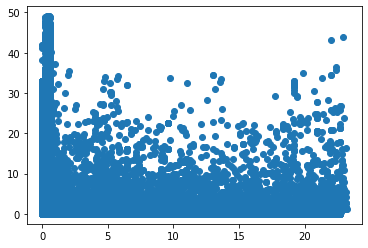

In [41]:
plt.scatter(df_cleaned['AFACostUnitPrice'],df_cleaned['Total Uplift'])

In [42]:
from sklearn.cluster import KMeans

In [43]:
corr=df_cleaned.corr()

In [44]:
corr

,AFACostUnitPrice,AFAInvNetTotal,AFASellUnitPrice,AFUnitPrice,CHECKAfiAffinityLevy,AF Total,AFA Cost Total,AFA Sell Total,Gross Margin,Gross Margin %,Total Uplift,Total Uplift %,FinPd,FinYearInv,InvQty,InvoiceRegisterEntryId,MemberNumber,ProdCategoryID
AFACostUnitPrice,1.000000,-0.179805,0.629537,0.999937,0.174219,-0.170969,-0.170166,-0.179840,-0.279254,-0.378668,-0.264944,-0.328245,-0.026842,-0.059620,-0.238165,-0.107204,0.084013,0.310655
AFAInvNetTotal,-0.179805,1.000000,-0.344210,-0.179714,-0.492093,0.998997,0.999004,0.999986,0.687537,-0.519175,0.728090,-0.057751,-0.007320,-0.032674,0.924036,-0.026588,-0.126250,-0.804530
AFASellUnitPrice,0.629537,-0.344210,1.000000,0.629302,0.171938,-0.361750,-0.361164,-0.344226,0.046364,0.137727,0.024718,-0.042517,0.008188,0.024702,-0.392321,0.049259,0.057946,0.423664
AFUnitPrice,0.999937,-0.179714,0.629302,1.000000,0.170424,-0.170860,-0.170067,-0.179748,-0.279301,-0.378887,-0.265138,-0.332322,-0.027157,-0.060537,-0.237849,-0.108650,0.084110,0.311479
CHECKAfiAffinityLevy,0.174219,-0.492093,0.171938,0.170424,1.000000,-0.489188,-0.488461,-0.492110,-0.390209,0.225326,-0.395833,0.203177,0.002718,0.023365,-0.492876,0.024568,0.049210,0.403493
AF Total,-0.170969,0.998997,-0.361750,-0.170860,-0.489188,1.000000,0.999994,0.999011,0.654673,-0.534071,0.696901,-0.084244,-0.011440,-0.040098,0.922314,-0.036764,-0.124845,-0.802044
AFA Cost Total,-0.170166,0.999004,-0.361164,-0.170067,-0.488461,0.999994,1.000000,0.999017,0.654692,-0.534189,0.697096,-0.083777,-0.011409,-0.039936,0.922014,-0.036606,-0.124688,-0.801693
AFA Sell Total,-0.179840,0.999986,-0.344226,-0.179748,-0.492110,0.999011,0.999017,1.000000,0.687551,-0.519146,0.728104,-0.057749,-0.007337,-0.032660,0.924049,-0.026591,-0.126231,-0.804530
Gross Margin,-0.279254,0.687537,0.046364,-0.279301,-0.390209,0.654673,0.654692,0.687551,1.000000,-0.102139,0.996906,0.387653,0.061782,0.097275,0.653801,0.146220,-0.110040,-0.586677
Gross Margin %,-0.378668,-0.519175,0.137727,-0.378887,0.225326,-0.534071,-0.534189,-0.519146,-0.102139,1.000000,-0.140019,0.533445,0.092147,0.183565,-0.477603,0.327381,0.035902,0.402348


In [60]:
data_fitter=df_cleaned.drop(['CMemType','InvoiceStateName','ProdStatus','ProductAreaName'],axis=1)

In [36]:
df_cleaned.to_csv('datascleaned.csv')

In [37]:
df_cleaned.to_excel('excel.xlsx')

In [38]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [43]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
from sklearn.cluster import KMeans

In [70]:
data=data_fitter.drop(['InvDate', 'InvQty', 'InvType', 'InvoiceRegisterEntryId', 'MemAlpha',
       'MemStatus', 'MemberNumber', 'PaymentTypeName', 'ProdCategoryID',
       'ProdCategory', 'ProdCode (Custom SQL Query1)', 'ProdCode',
       'ProdCostCentre', 'ProdName', 'ProdPack','Statement Date', 'CostCentre','FinPd', 'FinYearInv', 'FinYear'],axis=1)

In [71]:
data.columns

Index(['AFACostUnitPrice', 'AFAInvNetTotal', 'AFASellUnitPrice', 'AFUnitPrice',
       'CHECKAfiAffinityLevy', 'AF Total', 'AFA Cost Total', 'AFA Sell Total',
       'Gross Margin', 'Gross Margin %', 'Total Uplift', 'Total Uplift %'],
      dtype='object')

In [76]:
datas=data.drop(['AFAInvNetTotal','AF Total', 'AFA Cost Total', 'AFA Sell Total','Gross Margin', 'Gross Margin %','Total Uplift %'],axis=1)

In [77]:
datas.columns

Index(['AFACostUnitPrice', 'AFASellUnitPrice', 'AFUnitPrice',
       'CHECKAfiAffinityLevy', 'Total Uplift'],
      dtype='object')

In [80]:
datas.dtypes

AFACostUnitPrice        float64
AFASellUnitPrice        float64
AFUnitPrice             float64
CHECKAfiAffinityLevy    float64
Total Uplift            float64
dtype: object

In [81]:
datas.shape

(123774, 5)

In [84]:
datas["AFACostUnitPrice"] = datas["AFACostUnitPrice"].astype('int64')
datas["AFASellUnitPrice"] = datas["AFASellUnitPrice"].astype('int64')
datas["AFUnitPrice"] = datas["AFUnitPrice"].astype('int64')
datas["CHECKAfiAffinityLevy"] = datas["CHECKAfiAffinityLevy"].astype('int64')
datas["Total Uplift"] = datas["Total Uplift"].astype('int64')

In [85]:
datas.dtypes

AFACostUnitPrice        int64
AFASellUnitPrice        int64
AFUnitPrice             int64
CHECKAfiAffinityLevy    int64
Total Uplift            int64
dtype: object

In [125]:
x=datas.iloc[:,[2,4]]

In [126]:
X=x.values

In [127]:
wcss=[]

In [128]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

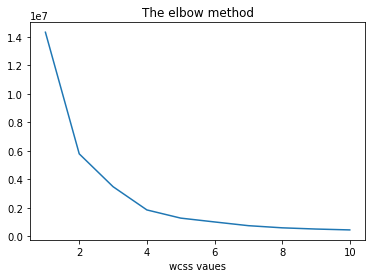

In [132]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('wcss vaues')
plt.show()

In [133]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++',random_state=0)

In [134]:
y_kmeans=kmeansmodel.fit_predict(X)

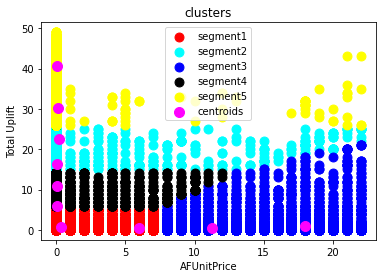

In [136]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s=80,c="red",label='segment1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s=80,c="cyan",label='segment2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s=80,c="blue",label='segment3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s=80,c="black",label='segment4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s=80,c="yellow",label='segment5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='magenta',label='centroids')
plt.title('clusters')
plt.xlabel('AFUnitPrice')
plt.ylabel('Total Uplift')
plt.legend()
plt.show()
